In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def formatarq(txt,nm):
  with open(txt, 'r') as fd:
    txt = fd.read()  # Ler todo o arquivo
  txt = txt.replace('|',',')
  txt = txt.replace(' ','')
  with open(nm, 'w') as fd:
    fd.write(txt)

In [3]:
formatarq('exp_cluster1.txt','cluster1.txt')
formatarq('exp_cluster2.txt','cluster2.txt')

In [6]:
cl1 = pd.read_csv('cluster1.txt')
cl2 = pd.read_csv('cluster2.txt')
cl1

,Unnamed: 0,Name,Succ,Fail,SendRate(TPS),MaxLatency(s),MinLatency(s),AvgLatency(s),Throughput(TPS),Unnamed: 9
0,NaN,rnd01,64,0,10.7,2.26,0.27,0.83,7.7,NaN
1,NaN,rnd02,64,0,10.7,2.28,0.27,0.84,7.7,NaN
2,NaN,rnd03,64,0,10.7,2.29,0.28,0.85,7.7,NaN
3,NaN,rnd04,64,0,10.6,2.41,0.24,0.84,7.6,NaN
4,NaN,rnd05,64,0,10.7,2.35,0.26,0.80,7.7,NaN
...,...,...,...,...,...,...,...,...,...,...
105,NaN,rnd06,1204,0,200.6,35.74,0.73,15.18,29.9,NaN
106,NaN,rnd07,1204,0,200.5,23.99,0.59,10.98,40.7,NaN
107,NaN,rnd08,1204,0,200.5,33.49,0.75,13.43,30.7,NaN
108,NaN,rnd09,1195,0,198.9,26.51,0.62,14.26,37.4,NaN


In [5]:
print(cl1['AvgLatency(s)'])

0       0.83
1       0.84
2       0.85
3       0.84
4       0.80
       ...  
105    15.18
106    10.98
107    13.43
108    14.26
109     9.82
Name: AvgLatency(s), Length: 110, dtype: float64


In [134]:
print(cl2['AvgLatency(s)'])

0       1.07
1       0.85
2       0.86
3       0.87
4       0.85
       ...  
105    11.85
106    11.43
107    12.29
108    10.46
109    12.35
Name: AvgLatency(s), Length: 110, dtype: float64


In [7]:
def media(cl,var):
  mdlt = []
  rdns = cl[var]
  partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
  for i in partes:
    mdlt.append(np.mean(i))
  return mdlt

In [52]:
mdlt1 = media(cl1,'AvgLatency(s)')
mdlt2 = media(cl2,'AvgLatency(s)')
# # confere a funcao media
# rdns = cl1['AvgLatency(s)']
# partes = [ rdns[index:index+10] for index in range(0, len(cl1['AvgLatency(s)']), 10) ]
# np.mean(partes[0])
#
print([ float("%.02f" % x) for x in mdlt1])
print([ float("%.02f" % x) for x in mdlt2])

[0.83, 0.57, 0.65, 1.96, 3.04, 3.73, 5.28, 6.33, 7.97, 10.01, 11.88]
[0.9, 0.65, 0.62, 3.39, 3.78, 4.12, 6.65, 8.47, 9.94, 11.5, 11.87]


In [56]:
mdvz1 = media(cl1,'Throughput(TPS)')
mdvz2 = media(cl2,'Throughput(TPS)')
print([ float("%.02f" % x) for x in mdvz1])
print([ float("%.02f" % x) for x in mdvz2])

[7.69, 14.64, 29.01, 41.01, 45.34, 49.19, 47.67, 48.89, 47.99, 43.5, 40.36]
[7.64, 14.69, 28.94, 34.46, 41.15, 47.73, 42.06, 41.21, 41.58, 41.87, 44.47]


In [40]:
def erroMedia(cl, var, confianca=0.95):
  erro = []
  rdns = cl[var]
  partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
  for i in partes:
    interval = st.t.interval(alpha=confianca,df=len(i)-1,loc=np.mean(i),scale=st.sem(i))
    erro.append(np.mean(i) - interval[0])
  return erro

[0.02, 0.02, 0.11, 0.27, 0.46, 0.43, 0.21, 0.5, 0.7, 0.82, 1.36]
[0.05, 0.01, 0.04, 1.14, 0.56, 0.39, 0.38, 0.84, 0.57, 0.7, 0.5]


<Figure size 432x288 with 0 Axes>

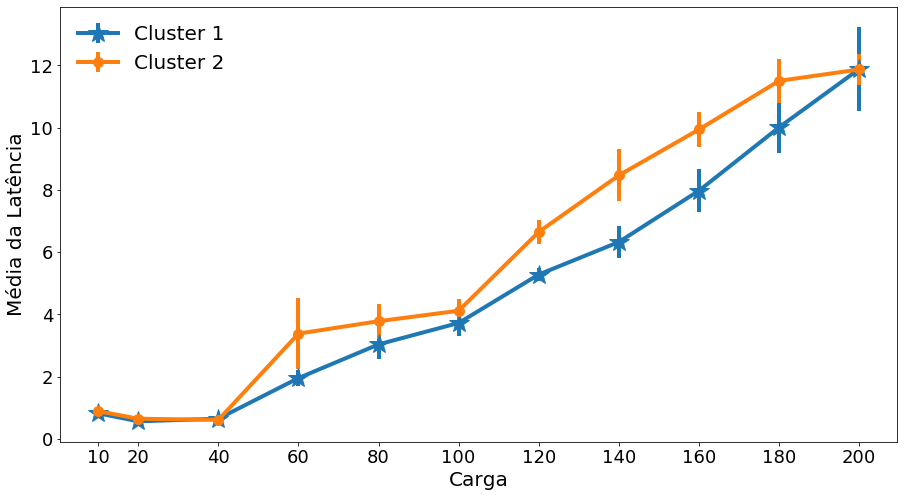

In [54]:
x = [10, 20, 40, 60,80, 100, 120,140, 160,180, 200]
yerro1 = erroMedia(cl1,'AvgLatency(s)')
print([ float("%.02f" % x) for x in yerro1])
yerro2 = erroMedia(cl2,'AvgLatency(s)')
print([ float("%.02f" % x) for x in yerro2])
fig = plt.figure()
plt.subplots(figsize =(15,8))
plt.xlabel('Carga', fontsize=20)
plt.ylabel('Média da Latência',size=20)
plt.errorbar(x, mdlt1, yerr=yerro1,marker='*',label="Cluster 1", linewidth=4, markersize=20)
plt.errorbar(x, mdlt2, yerr=yerro2,marker='.',label="Cluster 2", linewidth=4, markersize=20)
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.savefig('analise_medlat_erro_rouds.pdf')

[0.04, 0.21, 0.34, 2.4, 2.89, 2.48, 1.81, 3.61, 3.21, 4.79, 5.52]
[0.05, 0.12, 0.15, 4.26, 2.18, 1.7, 1.25, 1.99, 1.4, 1.42, 1.93]


<Figure size 432x288 with 0 Axes>

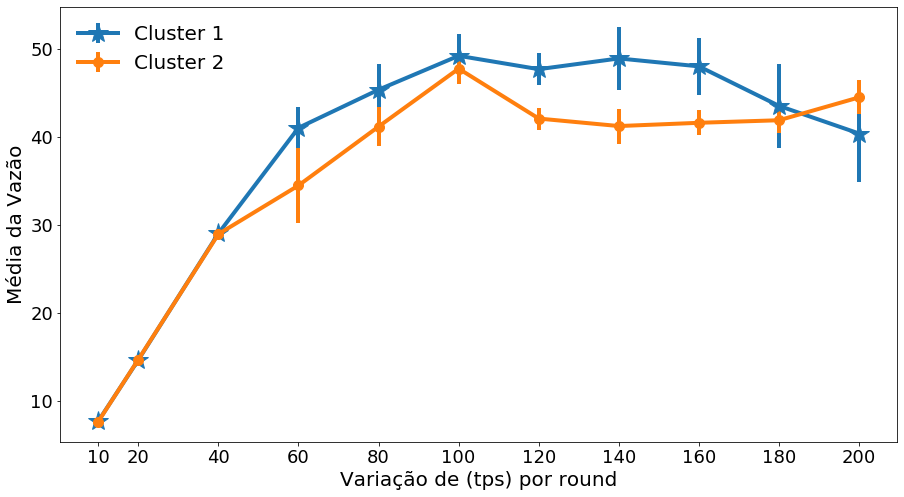

In [55]:
x = [10, 20, 40, 60,80, 100, 120,140, 160,180, 200]
yerro1 = erroMedia(cl1,'Throughput(TPS)')
print([ float("%.02f" % x) for x in yerro1])
yerro2 = erroMedia(cl2,'Throughput(TPS)')
print([ float("%.02f" % x) for x in yerro2])
fig = plt.figure()
plt.subplots(figsize =(15,8))
plt.xlabel('Variação de (tps) por round', fontsize=20)
plt.ylabel('Média da Vazão',size=20)
plt.errorbar(x, mdvz1, yerr=yerro1,marker='*',label="Cluster 1", linewidth=4, markersize=20)
plt.errorbar(x, mdvz2, yerr=yerro2,marker='.',label="Cluster 2", linewidth=4, markersize=20)
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.savefig('analise_medvaz_erro_rouds.pdf')